In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from IPython.display import display

In [29]:
spotify_dataset=pd.read_csv("/content/spotify-2023.csv", encoding='latin-1')
spotify_dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [30]:
# Checking how many columns and rows the database has. It has 953 rows and 24 columns.
spotify_dataset.shape

(953, 24)

In [31]:
# Display the first five rows of the dataset
spotify_dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [32]:
# Checking the datatypes, non-null counts and memory usage
spotify_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [33]:
# Getting the summary statistics for example mean, min, max, etc.
spotify_dataset.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [34]:
# Checking the amount of missing values for every column.
spotify_dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [35]:
# How many percent of the values are nulls in every column
missing_percentage = (spotify_dataset.isnull().sum() / len(spotify_dataset)) * 100
print(missing_percentage)

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64


In [36]:
# Replace the null values by 0
spotify_dataset['in_shazam_charts'].fillna(0, inplace=True)
spotify_dataset['key'].fillna(0, inplace=True)

spotify_dataset.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

In [37]:
# Let's check if 'streams' column has any non-numerical values

spotify_dataset['streams_numeric'] = pd.to_numeric(spotify_dataset['streams'], errors='coerce')
non_numeric_rows = spotify_dataset[spotify_dataset['streams_numeric'].isna()]

display(non_numeric_rows)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,A,Major,53,75,69,7,0,17,3,NaN


In [38]:
# Dropping the row, in index 574. We use reset_index so the indexes get updated.
spotify_dataset.drop(574, axis=0, inplace=True)

spotify_dataset.reset_index(drop=True, inplace=True)

# Checking that one row is succesfully deleted from the dataframe, we should have one row less in our
# dataframe.
spotify_dataset.shape

(952, 25)

In [39]:
# Converting 'streams'- column into a numeric value.
spotify_dataset['streams'] = pd.to_numeric(spotify_dataset['streams'], errors='coerce', downcast="integer")

print(spotify_dataset['streams'].dtype)

int64


In [40]:
spotify_dataset = spotify_dataset.sort_values(by='streams', ascending=False)

top_10_songs = spotify_dataset.head(10)

top_10_songs.reset_index(drop=True, inplace=True)

display(top_10_songs)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,C#,Major,50,38,80,0,0,9,7,3.703895e+09
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,3.562544e+09
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,C#,Major,50,45,41,75,0,11,3,2.887242e+09
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,F#,Minor,82,54,59,69,0,18,10,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2.808097e+09
5,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2.713922e+09
6,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2.665344e+09
7,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2.594040e+09
8,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,G#,Major,75,64,52,41,0,11,3,2.591224e+09
9,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,G,Major,68,49,59,16,0,13,28,2.565530e+09


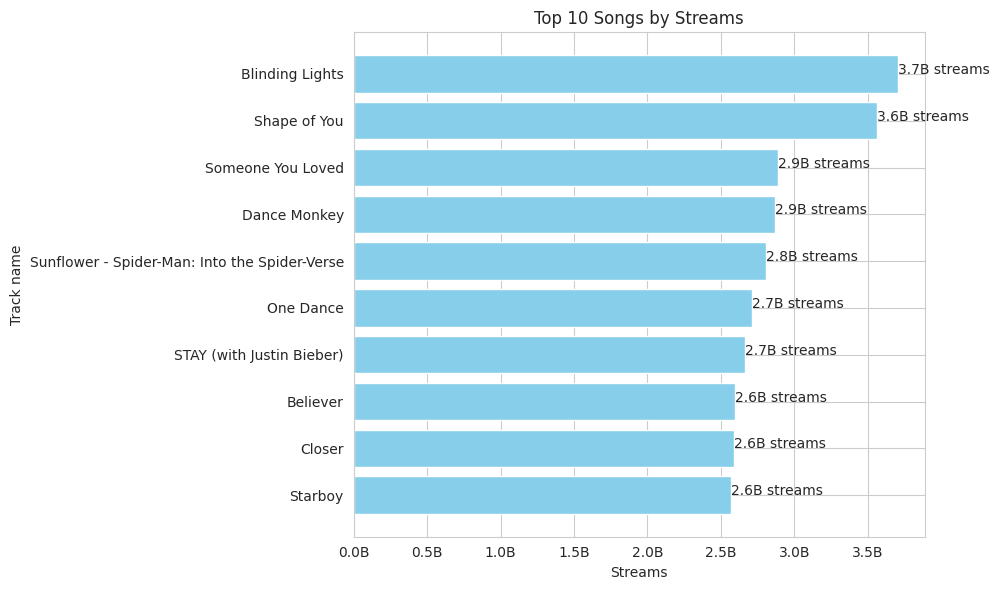

In [41]:
# Let's visualize the top 10 songs
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('Streams')
plt.ylabel('Track name')
plt.title('Top 10 Songs by Streams')
plt.gca().invert_yaxis()

# Define a custom tick formatter function
def billions_formatter(x, pos):
    return f'{x / 1e9:.1f}B'

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Annotate the bars with stream counts
for index, row in top_10_songs.iterrows():
    plt.text(row['streams'], index, f"{row['streams'] / 1e9:.1f}B streams")

plt.tight_layout()
plt.show()

In [42]:
# Splitting the artists by a comma
spotify_dataset['artist(s)_name'] = spotify_dataset['artist(s)_name'].str.replace(',', '')
spotify_dataset['artist(s)_name']

55                                            The Weeknd
179                                           Ed Sheeran
86                                         Lewis Capaldi
619                                          Tones and I
41                                  Post Malone Swae Lee
                             ...                        
68                                           Post Malone
142                                   Mc Pedrinho DJ 900
144                           Sog Ryan Castro Peso Pluma
393    Arijit Singh Vishal Dadlani Sukriti Kakar Vish...
123                            Carin Leon Grupo Frontera
Name: artist(s)_name, Length: 952, dtype: object

In [43]:
# now let's separate them into their own rows
spotify_dataset = spotify_dataset.explode('artist(s)_name', ignore_index=True)
spotify_dataset.reset_index(drop=True, inplace=True)

# We will also drop the artist_count column since we will not need it anymore
spotify_dataset.drop('artist_count', axis=1, inplace=True)

display(spotify_dataset)

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric
0,Blinding Lights,The Weeknd,2019,11,29,43899,69,3703895074,672,199,...,C#,Major,50,38,80,0,0,9,7,3.703895e+09
1,Shape of You,Ed Sheeran,2017,1,6,32181,10,3562543890,33,0,...,C#,Minor,83,93,65,58,0,9,8,3.562544e+09
2,Someone You Loved,Lewis Capaldi,2018,11,8,17836,53,2887241814,440,125,...,C#,Major,50,45,41,75,0,11,3,2.887242e+09
3,Dance Monkey,Tones and I,2019,5,10,24529,0,2864791672,533,167,...,F#,Minor,82,54,59,69,0,18,10,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone Swae Lee,2018,10,9,24094,78,2808096550,372,117,...,D,Major,76,91,50,54,0,7,5,2.808097e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,Overdrive,Post Malone,2023,7,14,410,36,14780425,36,32,...,C#,Major,56,48,73,0,0,35,4,1.478042e+07
948,"Gol Bolinha, Gol Quadrado 2",Mc Pedrinho DJ 900,2023,6,1,293,8,11956641,5,2,...,B,Minor,93,68,65,42,0,12,25,1.195664e+07
949,QUEMA,Sog Ryan Castro Peso Pluma,2023,7,13,437,31,11599388,17,29,...,0,Major,79,92,89,5,0,6,5,1.159939e+07
950,Jhoome Jo Pathaan,Arijit Singh Vishal Dadlani Sukriti Kakar Vish...,2022,12,22,138,4,1365184,13,78,...,G,Major,82,62,74,10,0,33,7,1.365184e+06


In [49]:
# Let's check if there are any duplicates in the dataframe
duplicated_rows = spotify_dataset[spotify_dataset.duplicated(keep=False)]
display(duplicated_rows)

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,streams_numeric


In [46]:
# Calculating the sum of streams, and displaying the 10 most streamed artists
artist_streams = spotify_dataset.groupby('artist(s)_name')['streams'].sum()

most_streamed_artist = artist_streams.sort_values(ascending=False).head(10)

for artist, streams in most_streamed_artist.items():
    print(f"{artist}: {streams} total streams")

The Weeknd: 14185552870 total streams
Taylor Swift: 14053658300 total streams
Ed Sheeran: 13908947204 total streams
Harry Styles: 11608645649 total streams
Bad Bunny: 9997799607 total streams
Olivia Rodrigo: 7442148916 total streams
Eminem: 6183805596 total streams
Bruno Mars: 5846920599 total streams
Arctic Monkeys: 5569806731 total streams
Imagine Dragons: 5272484650 total streams


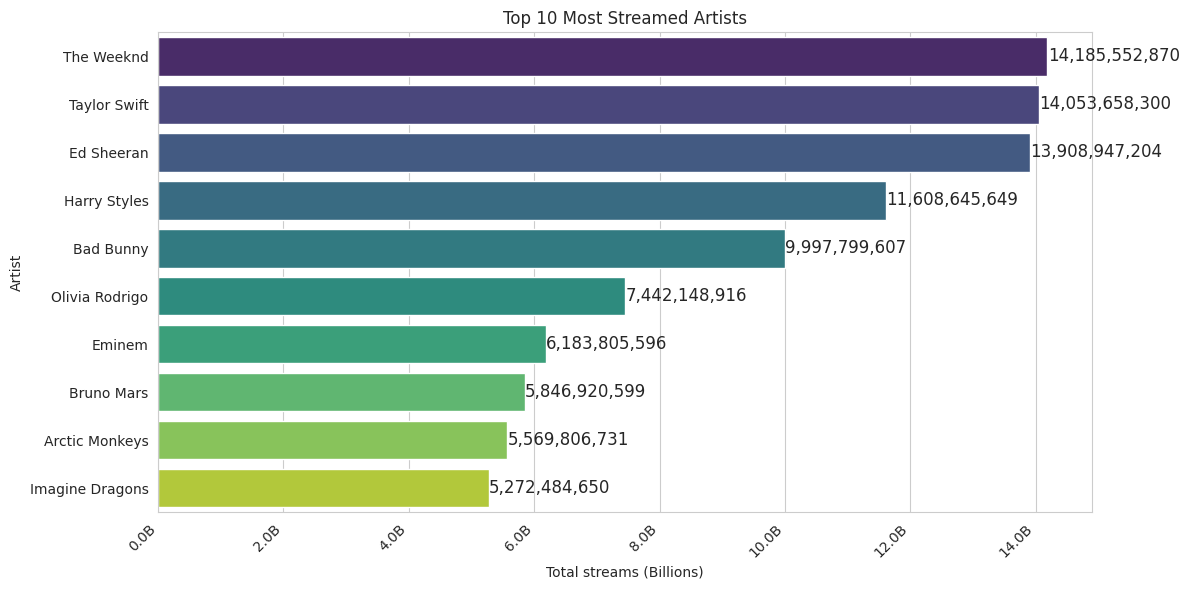

In [51]:
# Next, let's make a visualisation.
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=most_streamed_artist.values, y=most_streamed_artist.index, palette='viridis')

plt.xlabel('Total streams (Billions)')
plt.ylabel('Artist')
plt.title('Top 10 Most Streamed Artists')
plt.xticks(rotation=45, ha='right')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x / 1e9:.1f}B')
ax.xaxis.set_major_formatter(formatter)
for i, v in enumerate(most_streamed_artist.values):
    ax.text(v + 10000000, i, f'{v:,}', va='center', fontsize=12)
plt.tight_layout()

plt.show()

In [52]:
# Let's check which artists have most songs in the database
artist_track_count = spotify_dataset['artist(s)_name'].value_counts()

most_tracks_artist = artist_track_count.idxmax()
num_tracks = artist_track_count.max()

print(f"The artist with the most songs is '{most_tracks_artist}' with '{num_tracks}' songs")

The artist with the most songs is 'Taylor Swift' with '34' songs


In [53]:
# Let's check which 10 artists have most songs in the database
artist_track_counts = spotify_dataset['artist(s)_name'].value_counts()

top_10_artists = artist_track_counts.head(10)

print(top_10_artists)

Taylor Swift      34
The Weeknd        22
SZA               19
Bad Bunny         19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
Feid               8
BTS                8
Name: artist(s)_name, dtype: int64


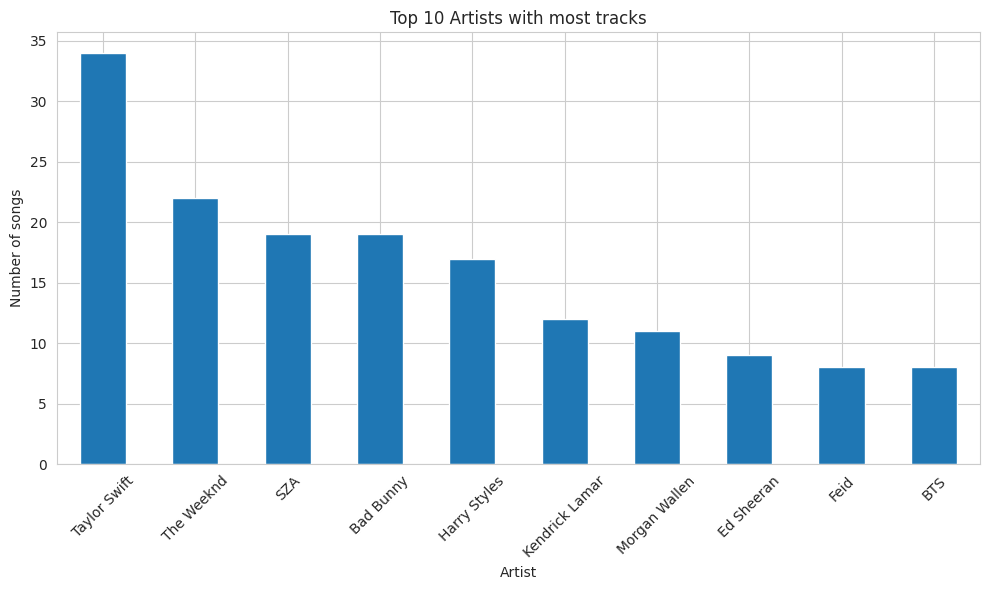

In [54]:
# Let's visualize it
artist_track_counts = spotify_dataset['artist(s)_name'].value_counts()

top_10_artists = artist_track_counts.head(10)

plt.figure(figsize=(10,6))
top_10_artists.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Number of songs')
plt.title('Top 10 Artists with most tracks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

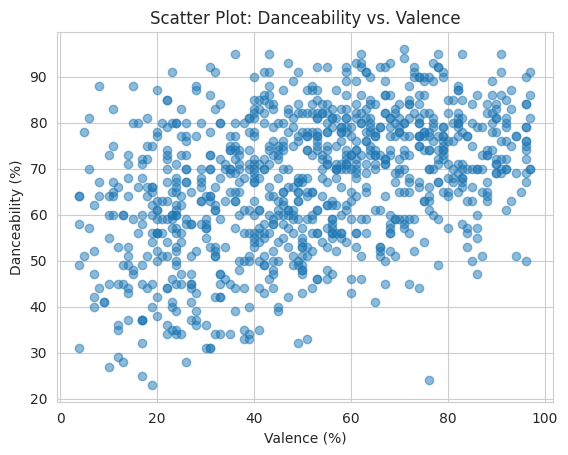

In [55]:
# Danceability and valecity correlation
plt.scatter(spotify_dataset['valence_%'], spotify_dataset['danceability_%'], alpha=0.5)
plt.xlabel('Valence (%)')
plt.ylabel('Danceability (%)')
plt.title('Scatter Plot: Danceability vs. Valence')
plt.grid(True)
plt.show()

In [56]:
# Printing the correlation between Danceability and Valence
correlation_coefficient = spotify_dataset['valence_%'].corr(spotify_dataset['danceability_%'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.4098727992120249


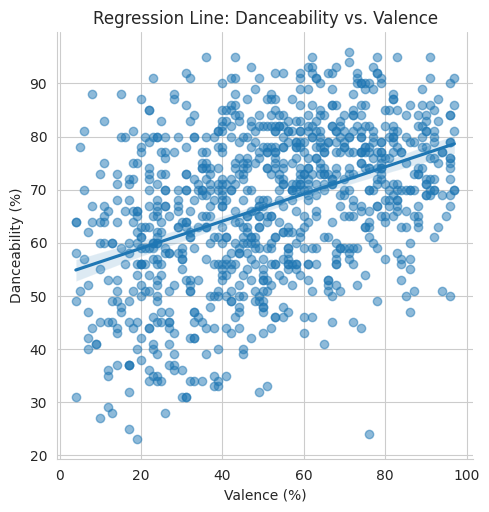

In [57]:
# Adding the regression line to the correlation chart
sns.lmplot(x='valence_%', y='danceability_%', data=spotify_dataset, scatter_kws={'alpha': 0.5})
plt.xlabel('Valence (%)')
plt.ylabel('Danceability (%)')
plt.title('Regression Line: Danceability vs. Valence')
plt.grid(True)
plt.show()

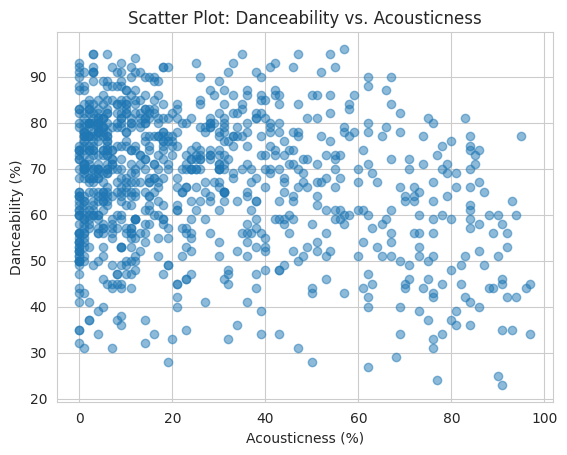

In [58]:
# Danceability and acousticness correlation
plt.scatter(spotify_dataset['acousticness_%'], spotify_dataset['danceability_%'], alpha=0.5)
plt.xlabel('Acousticness (%)')
plt.ylabel('Danceability (%)')
plt.title('Scatter Plot: Danceability vs. Acousticness')
plt.grid(True)
plt.show()

In [59]:
correlation_coefficient = spotify_dataset['acousticness_%'].corr(spotify_dataset['danceability_%'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: -0.23712804263530995


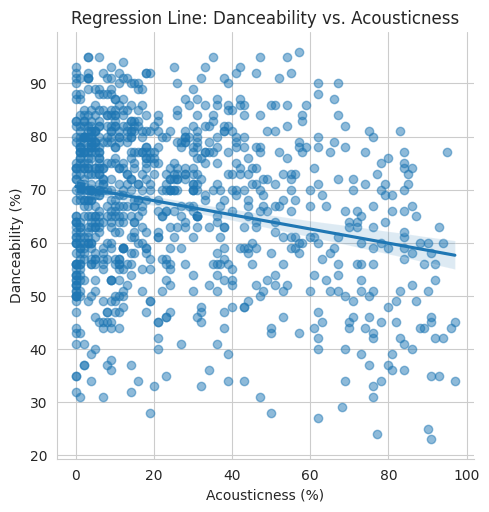

In [60]:
# Adding the regression line to the chart again
sns.lmplot(x='acousticness_%', y='danceability_%', data=spotify_dataset, scatter_kws={'alpha': 0.5})
plt.xlabel('Acousticness (%)')
plt.ylabel('Danceability (%)')
plt.title('Regression Line: Danceability vs. Acousticness')
plt.grid(True)
plt.show()

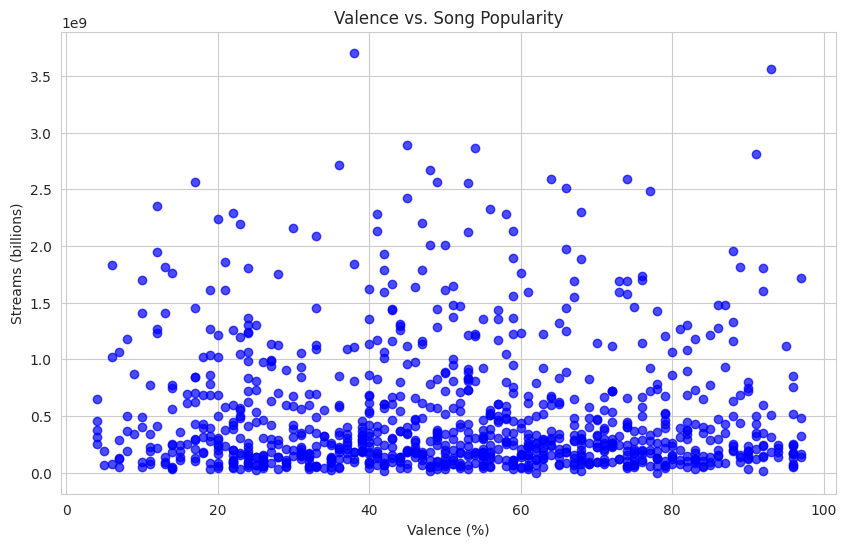

In [61]:
# How valence affects to popularity

plt.figure(figsize=(10, 6))
plt.scatter(spotify_dataset['valence_%'], spotify_dataset['streams'], c='blue', alpha=0.7, marker='o')
plt.xlabel('Valence (%)')
plt.ylabel('Streams (billions)')
plt.title('Valence vs. Song Popularity')


plt.show()

In [62]:
# Printing the correlation between Valence and streams
valence_correlation = spotify_dataset = spotify_dataset['valence_%'].corr(spotify_dataset['streams'])

display(f'Valence vs. Streams Correlation: {valence_correlation}')

'Valence vs. Streams Correlation: -0.04083136749515949'